In [44]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [12]:
# Load Iris Dataset
df = load_iris()



In [29]:
# Instantiate K-Means Model with n_clusters = 3 using (KMeans())
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.data)


/Users/yaseen/developer/AI/AI_Orange_Course/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [30]:
# Calculate and print silhouette score usig (metrics.sulhouette_score())
score = metrics.silhouette_score(df.data, df.target)
print("Silhouette Score: ", score)

score = metrics.silhouette_score(df.data, kmeans.labels_)
print("Silhouette Score: ", score)

Silhouette Score:  0.503477440693296
Silhouette Score:  0.5528190123564095


In [33]:
# Compare the silhouette scores for different k values. 
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.data)
    score = metrics.silhouette_score(df.data, kmeans.labels_)
    print("Silhouette Score for k= " + str(i) + " is " + str(score))

Silhouette Score for k= 2 is 0.6810461692117462
Silhouette Score for k= 3 is 0.5528190123564095
Silhouette Score for k= 4 is 0.497455189017375
Silhouette Score for k= 5 is 0.48997211669094676
Silhouette Score for k= 6 is 0.3648340039670025
Silhouette Score for k= 7 is 0.34750423280461606
Silhouette Score for k= 8 is 0.3405163499709049
Silhouette Score for k= 9 is 0.3421910296019886


/Users/yaseen/developer/AI/AI_Orange_Course/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yaseen/developer/AI/AI_Orange_Course/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yaseen/developer/AI/AI_Orange_Course/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yaseen/developer/AI/AI_Orange_Course/.venv/lib/python3.10/si

In [22]:
df_mail = pd.read_csv('../csv/Mall_Customers.csv')
df_mail.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
numirical_data = df_mail[features]

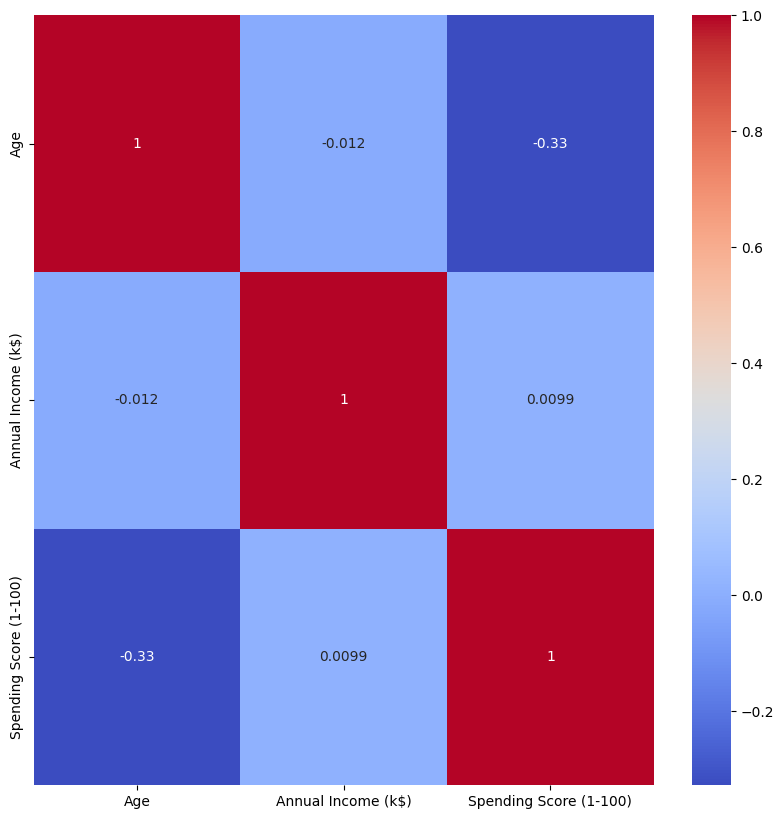

In [26]:
# A.) Plot heat map to remove highly corelated columns(if any)
plt.figure(figsize=(10,10))
sns.heatmap(numirical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [34]:
#B.) Choose Age, Annual Income and Spending Score as columns on which to run K-Means Algorithm
kmeans = KMeans(n_clusters=5)
kmeans.fit(numirical_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/Users/yaseen/developer/AI/AI_Orange_Course/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


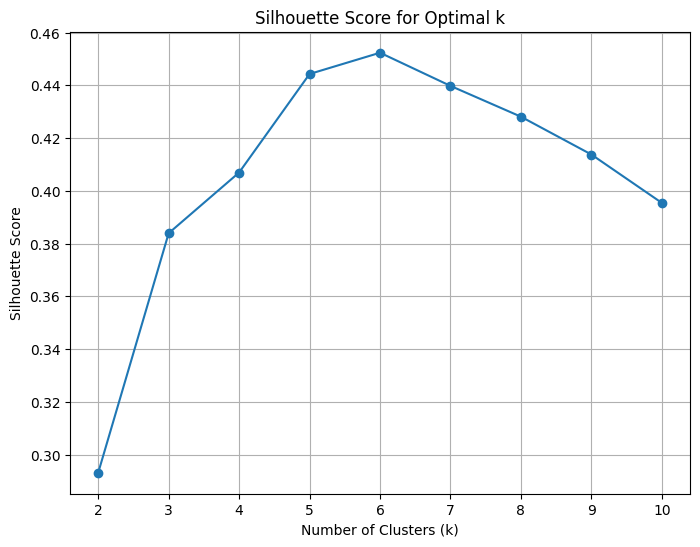

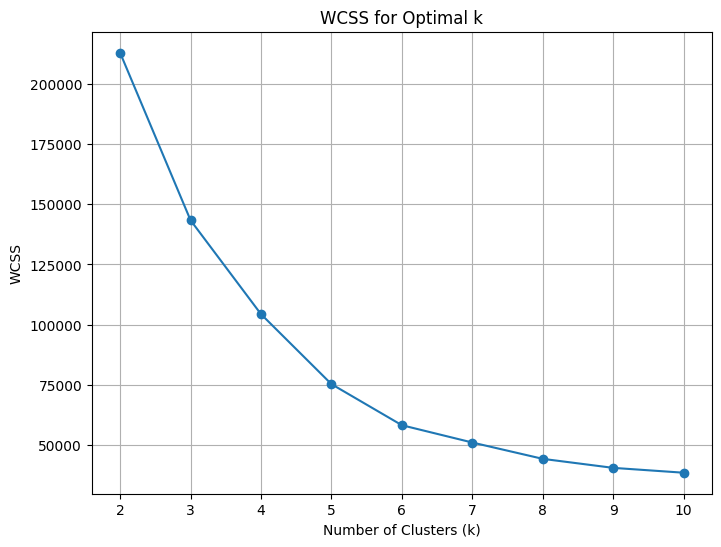

In [52]:
 #Find the optimal number of clusters for this dataset. To do that
 #i. Use WCSS (within-cluster-sum-of-squares) parameter. WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.
 #ii. Use Silhouette Score to find the optimal number of clusters. The idea is to choose the number of clusters where score is closest to 1.
 

silhouette_scores = []
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(numirical_data)
    score = metrics.silhouette_score(numirical_data, kmeans.labels_)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('WCSS for Optimal k')
plt.grid()
plt.show()

# # Find the optimal number of clusters with the highest Silhouette Score
# optimal_k = np.argmax(silhouette_scores) + min_clusters
# print(f"The optimal number of clusters is {optimal_k} with a Silhouette Score of {max(silhouette_scores)}")
# In this updated code, max_clusters is calculated based on the number of samples in your dataset (len(numirical_data)) to ensure it falls within a valid range. This should help you avoid the "Number of labels is 1" error.






 

In [45]:
optimal_k = np.argmax(silhouette_scores) + 2
print(f"The optimal number of clusters is {optimal_k} with a Silhouette Score of {max(silhouette_scores)}")

The optimal number of clusters is 6 with a Silhouette Score of 0.4523443947724053


In [54]:
#After finding the optimal number train the algorithm using the found no. of clusters and predict the cluster label for each row in the data.
kmeans = KMeans(n_clusters=optimal_k)
# take first 180 rows for training
x_train = numirical_data.iloc[:180]
x_test = numirical_data.iloc[180:]
kmeans.fit(x_train)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pred = kmeans.predict(x_test)
print(pred)


[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


/Users/yaseen/developer/AI/AI_Orange_Course/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
